In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def cv_show(img):
    # 图像读取
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread("data/image/boat1.jpeg")

cv_show(img)

## 直方图

In [5]:
# cv2.calcHist(images, channels, mask, hitSize, ranges)
#    images: 原图格式为unit8或float32；当传入函数时，要用[]，如[img]
#    channels: 用[]表示，表明统计的通道。若为灰度图，为[0]；若为彩色图，传入参数[0][1][2]分别代表 BGR
#    mask: 掩码图像。若统计整幅图为None，若统计某一部分需指定
#    histSize：BIN的数目，用[]
#    ranges: 像素值范围为[0, 256]

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
print("hist.shape: ", hist.shape)

hist.shape:  (256, 1)


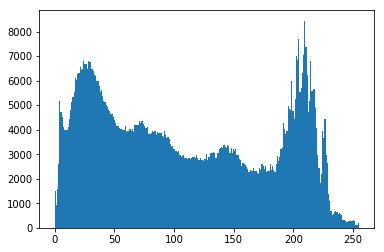

In [6]:
plt.hist(img.ravel(), 256)
plt.show()

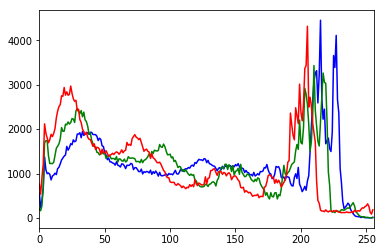

In [7]:
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

## 掩码操作

In [8]:
# 创建掩码, 要保留的像素设置为255
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255

cv_show(mask)

In [9]:
# 进行与操作
masked_img = cv2.bitwise_and(img, img, mask=mask) # 与操作

cv_show(masked_img)

In [12]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

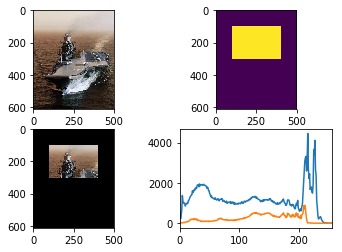

In [13]:
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mask)
plt.subplot(223), plt.imshow(masked_img)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)

plt.xlim([0, 256])
plt.show()

## 直方图均衡化